# Modelling herb runs in Old School Runescape

## 04-Raw data & exploratory analysis
All of the following data anlaysis will take place using Python in .ipynb (Interactive Python Notebook) format using JupyterLab. Firstly loading all the necessary modules and some base settings.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
%%capture
%load_ext ipycache

In [3]:
plt.rcParams['figure.figsize'] = (21.0, 13.0)
plt.rcParams['font.size'] = 18.0
sns.set_style('whitegrid')
sns.set_palette('bright')

Then we can import the herb run data recorded in data.csv into a pandas dataframe using read_csv.

In [4]:
df_herb = pd.read_csv('./data.csv')
df_herb

,Farming Guild,Port Phasmatys,Weiss,Catherby,Troll Stronghold,Hosidius,Ardougne,Falador
0,9,7,7,10.0,7,7,8.0,12.0
1,9,8,11,13.0,9,9,8.0,7.0
2,9,8,9,9.0,10,7,13.0,8.0
3,10,6,9,10.0,11,16,NaN,8.0
4,13,7,6,12.0,7,7,9.0,8.0
5,9,9,8,8.0,7,12,9.0,9.0
6,7,10,10,11.0,8,9,11.0,9.0
7,9,6,10,10.0,8,9,12.0,10.0
8,7,6,7,9.0,10,9,NaN,NaN
9,7,8,9,14.0,6,10,8.0,8.0


We can see that there are some NaN (not a number or empty) values in the dataset. These are due to the herb patches dying from disease and thus, did not result in any gathered data on a herb run. It looks as if the columns with NaN values present are stored in a different datatype, we can check this and for the sake of cohesion, convert all columns into the same datatype.

In [5]:
df_herb.dtypes

Farming Guild         int64
Port Phasmatys        int64
Weiss                 int64
Catherby            float64
Troll Stronghold      int64
Hosidius              int64
Ardougne            float64
Falador             float64
dtype: object

In [6]:
df_herb = df_herb.astype('float64')
df_herb.dtypes

Farming Guild       float64
Port Phasmatys      float64
Weiss               float64
Catherby            float64
Troll Stronghold    float64
Hosidius            float64
Ardougne            float64
Falador             float64
dtype: object

Next we can check if all of the minimal values of herbs harvested on each patch are above or equal to 6 which is the base guaranteed number due to using ultracompost.

In [7]:
df_herb.min()

Farming Guild       7.0
Port Phasmatys      6.0
Weiss               6.0
Catherby            6.0
Troll Stronghold    6.0
Hosidius            6.0
Ardougne            6.0
Falador             7.0
dtype: float64

We can see that no patch had a minimum value under the specified base number, so we can safely assume that ultracompost was used on all patches. Now we can subtract 6 from each entry to transform the data into the wanted random part, which is the extra number of herbs harvested on each patch. I have chosen to label this as a seperate dataset as we might need to come back to the true collected dataset later.

In [8]:
df_herbRand = df_herb - 6

Which will allow us to get some correct summary statistics on the extra number of herbs harvested at each patch.

In [9]:
round(df_herbRand.describe(),2)

,Farming Guild,Port Phasmatys,Weiss,Catherby,Troll Stronghold,Hosidius,Ardougne,Falador
count,17.00,17.00,17.00,16.00,17.00,17.00,15.00,16.00
mean,3.18,1.76,2.53,4.25,2.94,2.82,2.87,2.81
std,1.78,1.44,1.50,2.44,2.38,2.32,1.92,1.28
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,2.00,1.00,2.00,2.75,1.00,1.00,2.00,2.00
50%,3.00,2.00,3.00,4.00,2.00,3.00,2.00,2.50
75%,3.00,3.00,3.00,6.25,4.00,3.00,3.50,3.00
max,7.00,4.00,5.00,8.00,8.00,10.00,7.00,6.00


So we can see that on average the most productive herb patches are the Catherby and Farming Guild patches, whereas the worst patch is the Port Phasmatys patch. However, the Catherby, Troll Stronghold and Hosidius patches have a noticably large amount of variance in comparison to the rest of the patches. We can also consider viewing these summary statisics visually as boxplots by herb patch with a swarmplot of each datapoint on top to show the sample distribution of each by herb patch.

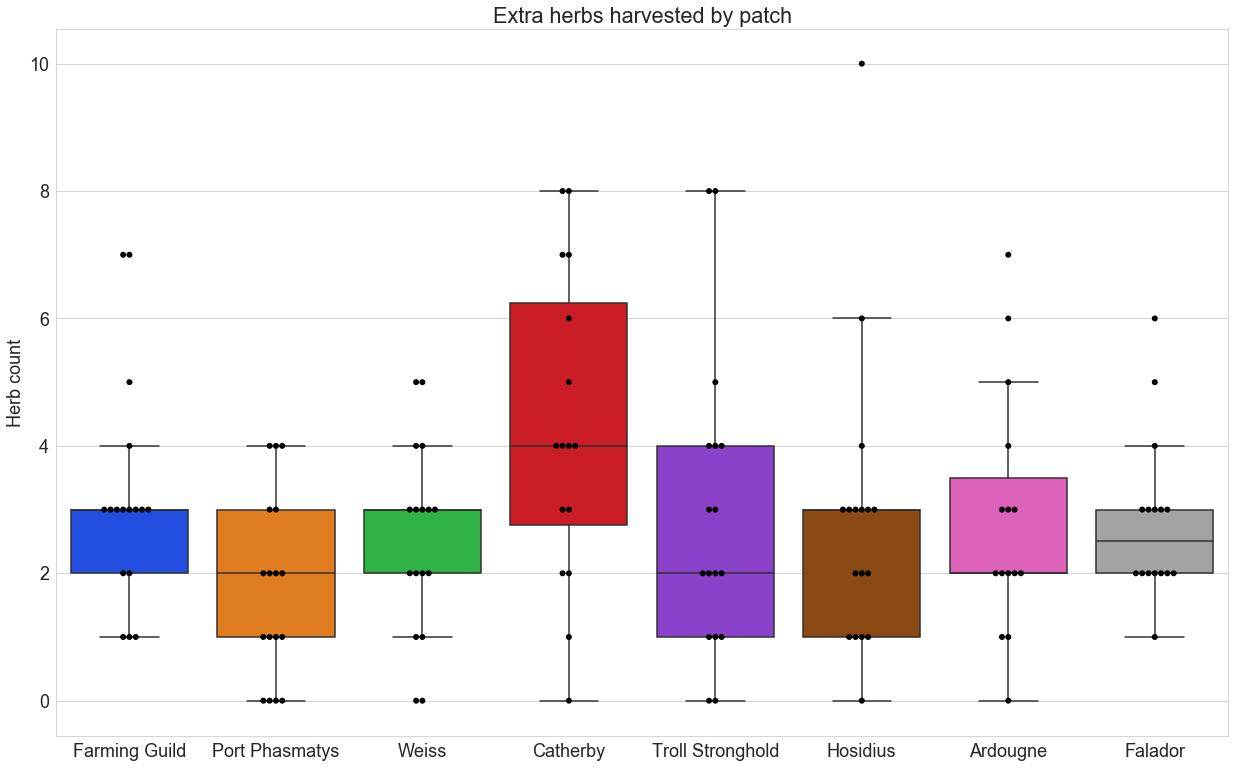

In [10]:
sns.boxplot(data = df_herbRand, showfliers = False)
sns.swarmplot(data = df_herbRand, color = "black", size = 6)
plt.ylabel('Herb count')
plt.title('Extra herbs harvested by patch');

This shows distinctly that Catherby is the most productive on average and all of the other patches seem roughly similar in distribution. Another great way to visualise the data is to produce a heatmap. This will allow us to visually compare individual realisations of the random variables in question.

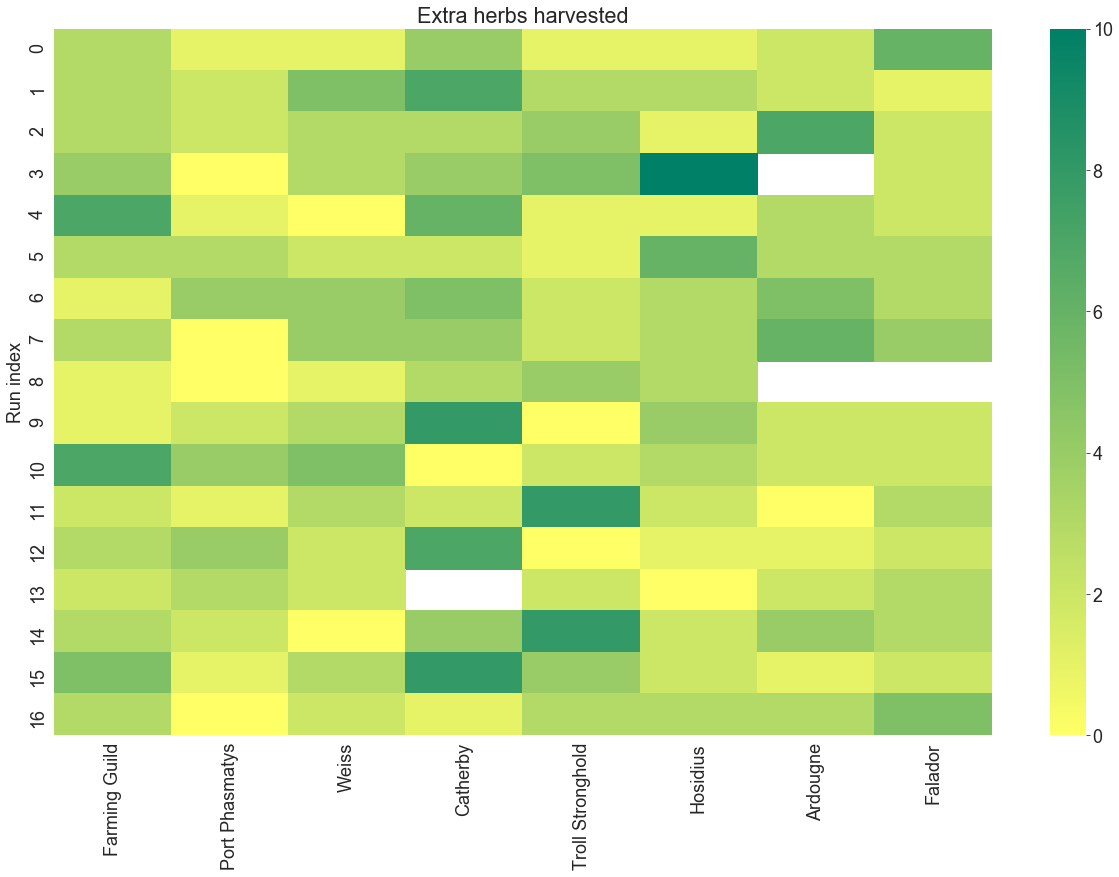

In [11]:
sns.heatmap(data = df_herbRand, cmap = "summer_r")
plt.ylabel("Run index")
plt.title("Extra herbs harvested");

From this we can see a rough view of the distribution of extra herbs harvested on each herb patch. We can clearly see that Catherby had the largest number of large harvests whereas all of the other patches had roughly similar harvests under some small variability. We can consider grouping the above columns into separate histograms by herb patch. This will show exactly how the collected data is distributed in order.

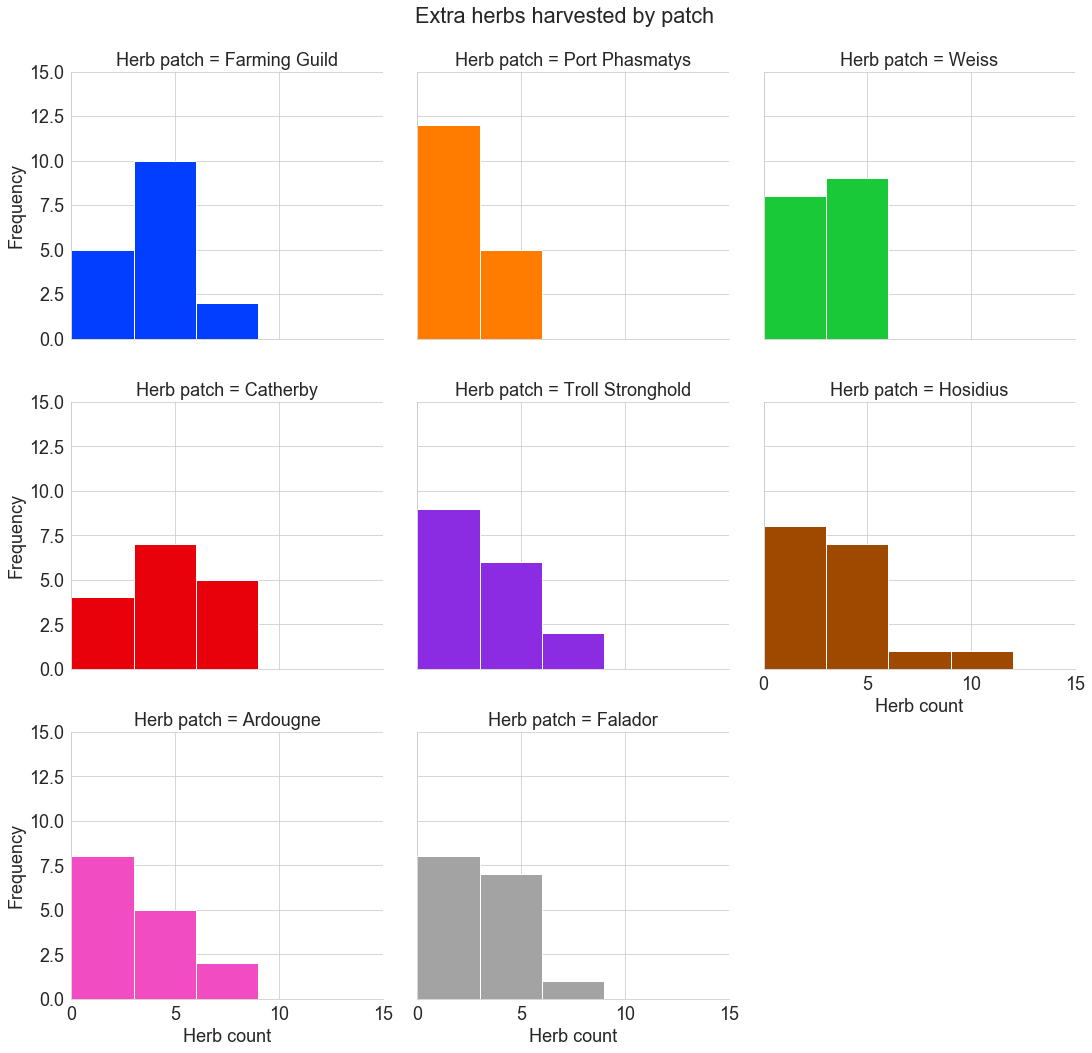

In [12]:
df_herbRandStacked = df_herbRand.stack().reset_index(1).rename(
    {'level_1': 'Herb patch', 0: 'Herb count'}, axis=1)
g1 = sns.FacetGrid(df_herbRandStacked, col = 'Herb patch',
                   col_wrap = 3, hue = 'Herb patch', xlim = [0,15],
                   ylim = [0,15], height = 5)
g1 = g1.map(plt.hist, 'Herb count', bins = np.linspace(0,15,6))
g1 = g1.set_ylabels('Frequency')
plt.subplots_adjust(top = 0.92)
g1.fig.suptitle('Extra herbs harvested by patch');

These histograms show that despite the small amount of collected data we can roughly see a negative binomial shape forming with some expected amount of variation. We can clearly see from the data that it is less likely to see herb counts of large value on each patch. So now we can consider summing each row in the data to view the data of each herb run instead of each herb patch.

In [13]:
df_herbRandRun = np.sum(df_herbRand, axis = 1)
df_herbRandRun

0     19.0
1     26.0
2     25.0
3     28.0
4     21.0
5     23.0
6     27.0
7     26.0
8     12.0
9     22.0
10    25.0
11    21.0
12    20.0
13    14.0
14    26.0
15    26.0
16    20.0
dtype: float64

Just as previously we can find some summary statistics that describe how the herb run data is distributed.

In [14]:
round(df_herbRandRun.describe(),2)

count    17.00
mean     22.41
std       4.50
min      12.00
25%      20.00
50%      23.00
75%      26.00
max      28.00
dtype: float64

So we seem to have centre mass of the distribution located around 22 herbs with most data lying in plus or minus 5 herbs. We can view the exact distribution of the data using a histogram again.

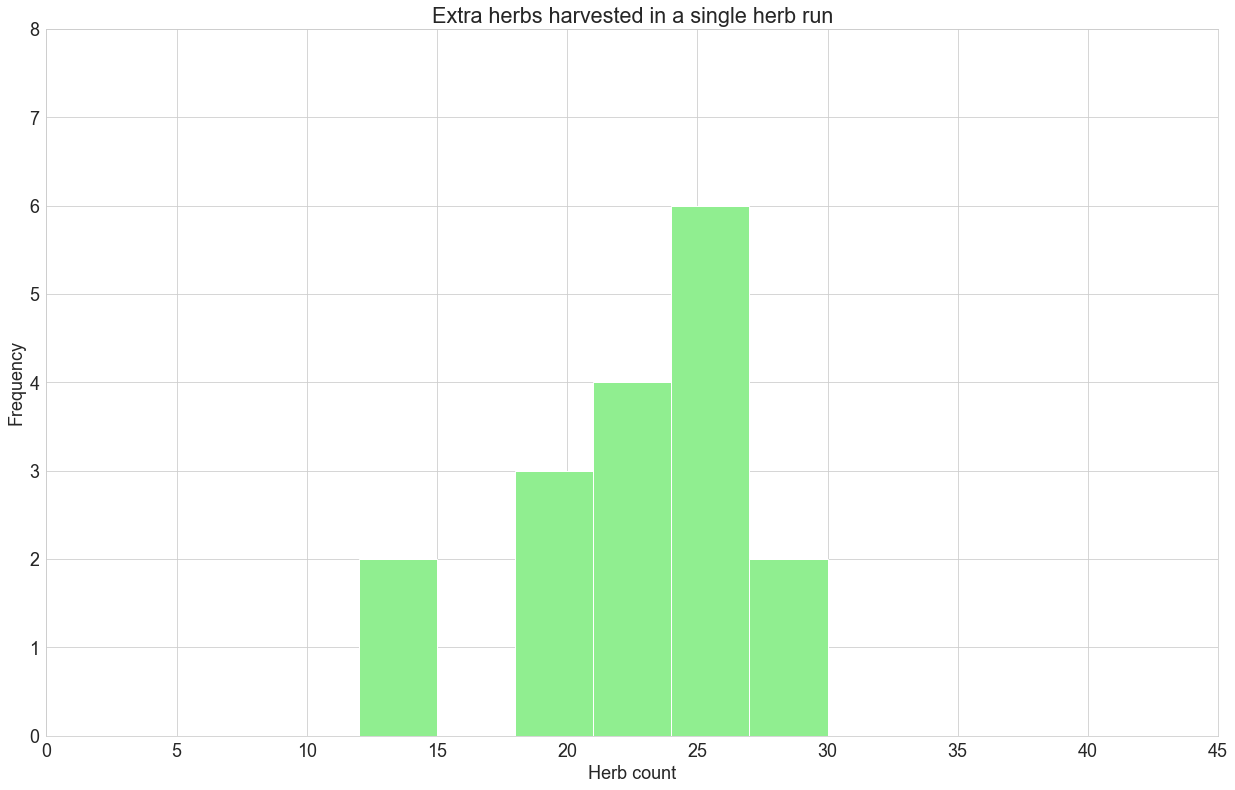

In [15]:
plt.hist(df_herbRandRun, color = 'lightgreen', bins = np.linspace(0,30,11))
plt.xlabel('Herb count')
plt.ylabel('Frequency')
plt.xlim(0,45)
plt.ylim(0,8)
plt.title('Extra herbs harvested in a single herb run');

Now we can complete our main statistical inference on the data by using the derived MLE to determine the sample probability of successfully picking a herb on each patch. 

In [16]:
MLE = df_herbRand.mean()/(1 + df_herbRand.mean())
MLE

Farming Guild       0.760563
Port Phasmatys      0.638298
Weiss               0.716667
Catherby            0.809524
Troll Stronghold    0.746269
Hosidius            0.738462
Ardougne            0.741379
Falador             0.737705
dtype: float64

So most of the estimates give the probability in question to be around a 0.7 or 70% chance to harvest an extra herb on each patch. Notably, we can see that the probability on the Catherby patch is around 0.8 or 80% chance to harvest an extra herb. The estimate for Port Phasmatys is also notably much lower than all the rest. This is quite interesting as if we compare the individual histograms we can see that Port Phasmatys is actually the one that looks closest to the expected negative binomial shape. Now we can consider using these MLE values to directly compute the negative binomial distribution for each herb patch. This will give us an overview of what we expect the previous histograms to tend to as the size of the data tends to infinity. Using the previously discussed probability distribution of a negative binomial random variable we can implement the PMF in Python.

In [17]:
def patchPMF(p,x):
    return p**x*(1-p)

Then we can plot this function for each MLE value to visualise our estimate of the probability distribution of picking $x$ amount of extra herbs before the first failure on each herb patch.

In [18]:
PMF = np.zeros((16,8))
for i in np.arange(len(MLE)):
    PMF[:,i] = patchPMF(MLE[i],np.arange(PMF.shape[0]))
df_PMF = pd.DataFrame(data = PMF, columns = MLE.index)

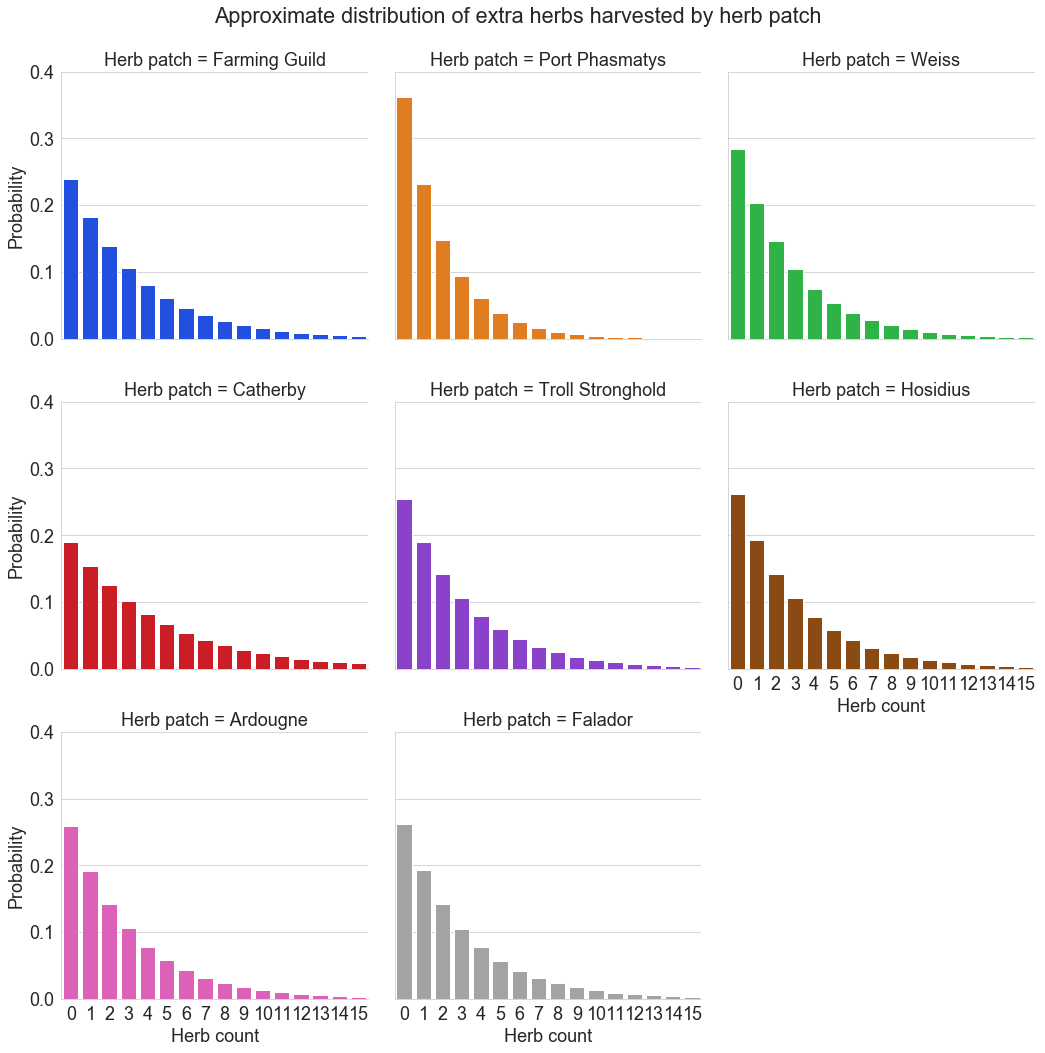

In [19]:
df_PMFStacked = df_PMF.stack().reset_index((0,1)).rename(
    {'level_0' : 'Herb count', 'level_1' : 'Herb patch', 0 : 'Probability'}, axis = 1)
g2 = sns.FacetGrid(data = df_PMFStacked, col = 'Herb patch',
                   col_wrap = 3, hue = 'Herb patch', xlim = [0,15],
                   ylim = [0,0.4], height = 5)
g2 = g2.map(sns.barplot, 'Herb count', 'Probability', order = df_PMF.index, ci = None)
plt.subplots_adjust(top = 0.92)
g2.fig.suptitle('Approximate distribution of extra herbs harvested by herb patch');

Now we can consider doing the same for the probability distribution of a single herb run. That is the probability of seeing $t$ extra herbs in total on a single herb run. As discussed in the previous section this distribution is a convolution of all eight of the above approximate probability distributions on each patch. We can construct this PMF exactly as derived mathemetically. However, note that this construction is highly unoptimal and I have found on average it takes roughly an hour or two to compute for values higher than 35. As we can see that as the chosen $t$ gets larger the number of operations increases dramatically. Sadly, as we need to sum all values of the joint PMF over all positive integer partitions (including zero) of $t$ of fixed length eight, there simply cannot be a more optimal solution. As this set gets very large for even small values of $t$.

In [20]:
def totalPMF(P, t):
    sm = 0
    for tPP in np.arange(t+1):
        for tW in np.arange(tPP+1):
            for tC in np.arange(tW+1):
                for tTS in np.arange(tC+1):
                    for tH in np.arange(tTS+1):
                        for tA in np.arange(tH+1):
                            for tF in np.arange(tA+1):
                                sm = sm + \
                                patchPMF(MLE[0], tF)*patchPMF(MLE[1], tA - tF) \
                                *patchPMF(MLE[2],tH-tA)*patchPMF(MLE[3], tTS-tH) \
                                *patchPMF(MLE[4],tC-tTS)*patchPMF(MLE[5],tW-tC) \
                                *patchPMF(MLE[6],tPP-tW)*patchPMF(MLE[7],t-tPP)
    return sm

So we can plot the above PMF to visualise the probability of seeing $t$ extra herbs picked in total on a single herb run. As this computation takes several hours to complete, I have chosen to save the result in an attached cache named mycache.pkl, for easier further use. 

In [21]:
tTotalPMF = np.arange(46)
probTotalPMF = np.zeros(46)

In [22]:
%%cache mycache.pkl probTotalPMF
for i in tTotalPMF:
    probTotalPMF[i] = totalPMF(MLE, i)

[Saved variables 'probTotalPMF' to file 'C:\Users\Henry Stuklis\Documents\GitHub\my-projects\Herb-Runs\mycache.pkl'.]


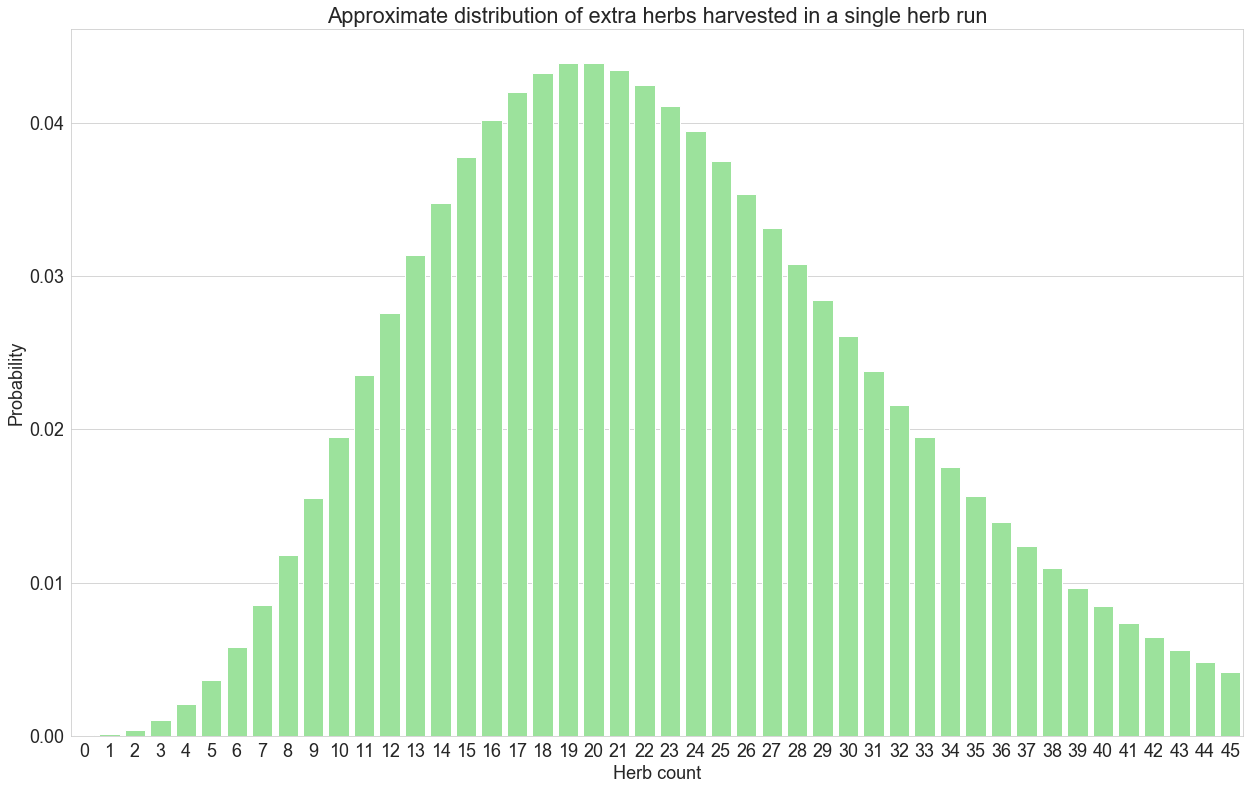

In [23]:
sns.barplot(x = tTotalPMF, y = probTotalPMF, color = 'lightgreen')
plt.xlabel('Herb count')
plt.ylabel('Probability')
plt.title('Approximate distribution of extra herbs harvested in a single herb run');

Hence, we could use these estimates to predict and simulate realisations of total extra herbs harvested on a herb run.

[Previous Page](https://github.com/HStuklis/my-projects/blob/master/herb-runs/03-herb-runs.ipynb) | [Next Page](https://github.com/HStuklis/my-projects/blob/master/herb-runs/05-herb-runs.ipynb)